### animal image classification
- feature: 224 * 224 image resize
- label: 10 kinds of animals
- learning algorithm: supervised learning, classification
- learning method: ANN, DNN, CNN..?
- frame work: Pytorch
- dataset: 'https://www.kaggle.com/datasets/alessiocorrado99/animals10/data?select=raw-img'

- 이미지 데이터를 csv로 저장이 가능하다면 csv 파일을 만들려고함.
- 전처리 된 데이터는 사용하기 쉬우니까. 따로 다시 전처리 할 필요 없이.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import torch
from torchvision import transforms
from torchvision.datasets import ImageFolder

In [17]:
torch.__version__

'2.4.1'

In [18]:
# 이미지 크기 재조정 및 tensor화

img_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation(degrees=1),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [19]:
img_datasets = ImageFolder(root='./data', transform=img_transforms)

In [20]:
img_datasets

Dataset ImageFolder
    Number of datapoints: 26179
    Root location: ./data
    StandardTransform
Transform: Compose(
               RandomHorizontalFlip(p=0.5)
               RandomVerticalFlip(p=0.5)
               RandomRotation(degrees=[-1.0, 1.0], interpolation=nearest, expand=False, fill=0)
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )

- 따로 csv 파일을 만들기에는 냅다 만든 img_datasets을 다 쪼개서 이용하넹..

In [21]:
img_datasets.classes

['cane',
 'cavallo',
 'elefante',
 'farfalla',
 'gallina',
 'gatto',
 'mucca',
 'pecora',
 'ragno',
 'scoiattolo']

In [22]:
len(img_datasets)

26179

In [23]:
from torch.utils.data import random_split

In [24]:
# train : test = 8 : 2
train_size = int(0.8 * len(img_datasets))
test_size = len(img_datasets) - train_size

train_datasets, test_datasets = random_split(img_datasets, [train_size, test_size])

# train : validation = 8 : 2
train_size = int(0.8 * len(train_datasets))
val_size = len(train_datasets) - train_size

train_datasets, val_datasets = random_split(train_datasets, [train_size, val_size])

print(f"train_datasets: {len(train_datasets)}")
print(f"test_datasets: {len(test_datasets)}")
print(f"validation_datasets: {len(val_datasets)}")

train_datasets: 16754
test_datasets: 5236
validation_datasets: 4189


In [28]:
from torch.utils.data import DataLoader
from torchvision.utils import make_grid

In [38]:
train_loader = DataLoader(train_datasets, batch_size=64, shuffle=True, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_datasets, batch_size=64, shuffle=False, num_workers=2, pin_memory=True)
val_loader = DataLoader(val_datasets, batch_size=64, shuffle=False, num_workers=2, pin_memory=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


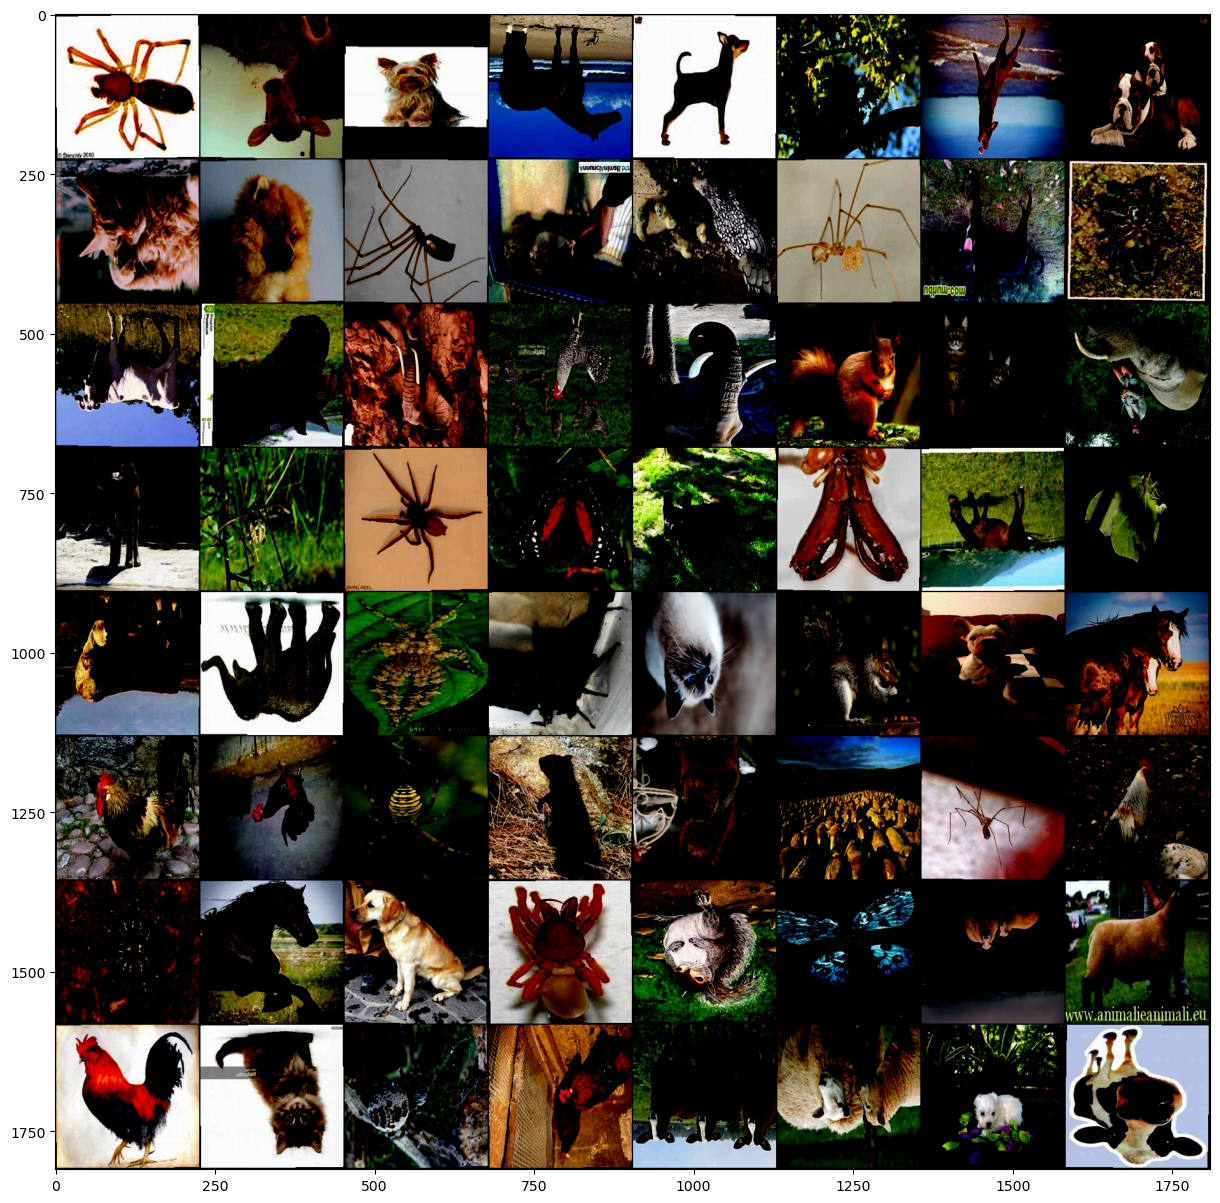

In [39]:
images, labels = next(iter(train_loader))
grid = make_grid(images, nrow=8)

plt.figure(figsize=(15, 15))
plt.imshow(np.transpose(grid, (1,2,0)))

plt.show()

In [40]:
import torch.nn as nn

In [41]:
# create vgg16 model
class VGG16(nn.Module):
  def __init__(self):
    super(VGG16,self).__init__()
    self.model = nn.Sequential(

        # first block
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),

        # second block
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
        nn.BatchNorm2d(128),
        nn.ReLU(),
        nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
        nn.BatchNorm2d(128),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),

        # third block
        nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),

        # fourth block
        nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1),
        nn.BatchNorm2d(512),
        nn.ReLU(),
        nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
        nn.BatchNorm2d(512),
        nn.ReLU(),
        nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
        nn.BatchNorm2d(512),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),

        #fifth block
        nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
        nn.BatchNorm2d(512),
        nn.ReLU(),
        nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
        nn.BatchNorm2d(512),
        nn.ReLU(),
        nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
        nn.BatchNorm2d(512),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),

        # fully connected layers
        nn.Flatten(),

        nn.Linear(in_features=512*7*7, out_features=4096),
        nn.ReLU(),
        nn.Dropout(),

        nn.Linear(in_features=4096, out_features=2048),
        nn.ReLU(),
        nn.Dropout(),

        nn.Linear(in_features=2048, out_features=80)

    )

  def forward(self, x):
    return self.model(x)

In [42]:
import torch.optim as optim

In [43]:
# create model instance
model = VGG16()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
loss_fn = nn.CrossEntropyLoss()

In [44]:
# train model
epochs = 25

training_loss = []
validation_loss = []

for epoch in range(epochs):

    # Training phase
    model.train()
    epoch_train_loss = 0.0
    for images, labels in train_loader:
        # Move data to the appropriate device
        images = images
        labels = labels

        # Clear gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        train_loss = loss_fn(outputs, labels)
        
        # Backward pass
        train_loss.backward()
        optimizer.step()

        epoch_train_loss += train_loss.item() * images.size(0)  # Accumulate loss

    # Average training loss for the epoch
    epoch_train_loss /= len(train_loader.dataset)
    training_loss.append(epoch_train_loss)

    # Validation phase
    model.eval()
    epoch_val_loss = 0.0
    with torch.inference_mode():
        for val_images, val_labels in val_loader:
            # Move validation data to the appropriate device
            val_images = val_images
            val_labels = val_labels

            val_outputs = model(val_images)
            val_loss = loss_fn(val_outputs, val_labels)
            epoch_val_loss += val_loss.item() * val_images.size(0)  # Accumulate loss

    # Average validation loss for the epoch
    epoch_val_loss /= len(val_loader.dataset)
    validation_loss.append(epoch_val_loss)

    # Print loss for the epoch
    print(f"Epoch: {epoch+1}/{epochs}, Training Loss: {epoch_train_loss:.4f}, Validation Loss: {epoch_val_loss:.4f}")
    
    # save model
    
    torch.save(model.state_dict(), './model/vgg16_model_params.pth')
    torch.save(model, './model/vgg16_model.pth')

Epoch: 1/25, Training Loss: 2.0523, Validation Loss: 1.7221
Epoch: 2/25, Training Loss: 1.6181, Validation Loss: 1.6057
Epoch: 3/25, Training Loss: 1.3838, Validation Loss: 1.2380


KeyboardInterrupt: 

In [ ]:
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Test model on test set
predicted_labels = []
actual_labels = []

model.eval()  # Set the model to evaluation mode
with torch.inference_mode():  # Ensure no gradients are computed
    for images, labels in test_loader:
        images = images
        labels = labels
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        predicted_labels.extend(predicted.cpu().numpy())
        actual_labels.extend(labels.cpu().numpy())

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns

In [ ]:
# Calculate evaluation metrics
accuracy = accuracy_score(actual_labels, predicted_labels)
precision = precision_score(actual_labels, predicted_labels, average='weighted', zero_division=0)
recall = recall_score(actual_labels, predicted_labels, average='weighted', zero_division=0)
f1 = f1_score(actual_labels, predicted_labels, average='weighted', zero_division=0)

# Print metrics
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print(f"Model Precision: {precision * 100:.2f}%")
print(f"Model Recall: {recall * 100:.2f}%")
print(f"Model F1 Score: {f1 * 100:.2f}%")

# Print classification report
print(classification_report(actual_labels, predicted_labels, zero_division=0))

# Generate and visualize confusion matrix
cm = confusion_matrix(actual_labels, predicted_labels)
class_names = test_datasets.classes

plt.figure(figsize=(40, 20))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()